<a href="https://colab.research.google.com/github/jeonghojo00/Pytorch/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practice Notebook addressed in <https://youtu.be/GIsg-ZUy0MY>

In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change current directory
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Vision/MNIST')

In [4]:
# Download training dataset (60000)
dataset = MNIST(root='data/', download=True)
print(len(dataset))
print(dataset[0])

60000
(<PIL.Image.Image image mode=L size=28x28 at 0x7F6E39575E10>, 5)


In [5]:
# Load test dataset (10000)
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matploblib inline is added to indicate that we weant to plot the graphs within the notebook. 
# Without this line, Colab will show the image in a popup. 
# Statements starting with % are called IPython magic commands and are used to configure the behavior of the environement itself.

Label:  5


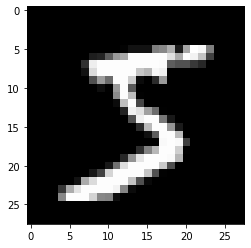

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

Label:  2


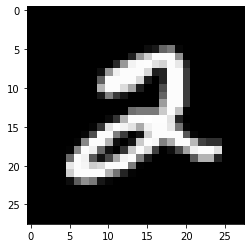

In [8]:
image, label = dataset[5]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# We will use ToTensor transform to convert images into PyTorch tensors
# MNIST datset (images and labels)
dataset = MNIST(root='data/',
               train=True,
               transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to 1x28x28 tensor. The first dimension is used to keep track of the clor channel

In [12]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


'1' represents white and '0' represents black

In [13]:
# Plot the image by passing in the 28x28 matrix

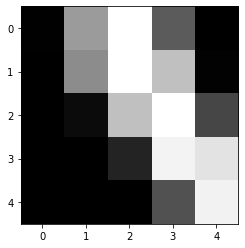

In [14]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

# Training and Validation Datasets

### Split dataset into Training and Validation datasets

In [15]:
# Select 20% of dataset to be validation set
val_pct = 0.2
n_train = int(len(dataset) * (1-val_pct))
n_val = len(dataset) - n_train
train_set, val_set = torch.utils.data.random_split(dataset, [n_train, n_val])
print("Number of Training Dataset: ", len(train_set))
print("Number of Validation Datset: ", len(val_set))

Number of Training Dataset:  48000
Number of Validation Datset:  12000


In [16]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_set, batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size)

In [17]:
len(train_loader)

375

# Model

Note that we have prepared our dataloaders, we can define our model
 * A logistic regression model is almost identital to a linear regression model. It contains weights and bias matrices. The output is obtained using a simple matrix operations ( Y_pred = x @ w.t() + b )
 * Since nn.Linear expects each training example to be a vector, each 1X28X28 image tensors is. lattened into a. ector of size 784 (28*28) before being passed into the. odel
 * The Output of each image is vector of. ize 10, with each element signifying the probability of.  particular target label (0 to 9). The predicted label for. ach image is simple the one with the highest probability

In [18]:
import torch.nn as nn

input_size = 28*28
num_classes = 10 #0 to 9

In [19]:
# Logistic regression model
# Linear(input_size, output_size)
model = nn.Linear(input_size, num_classes)

In [20]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0093,  0.0123,  0.0100,  ...,  0.0070, -0.0333, -0.0061],
        [ 0.0040, -0.0314, -0.0357,  ..., -0.0023, -0.0330, -0.0270],
        [ 0.0179, -0.0326, -0.0151,  ..., -0.0028, -0.0030,  0.0132],
        ...,
        [-0.0096,  0.0191,  0.0267,  ..., -0.0317, -0.0160, -0.0266],
        [-0.0271, -0.0266, -0.0219,  ...,  0.0240,  0.0169,  0.0056],
        [-0.0332, -0.0113,  0.0014,  ..., -0.0104,  0.0024,  0.0261]],
       requires_grad=True)


In [21]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0103,  0.0261, -0.0291, -0.0023,  0.0033,  0.0098,  0.0204, -0.0116,
        -0.0039, -0.0297], requires_grad=True)


In [22]:
train_loader

In [23]:
# Take the first batch of 100 images from our dataset, and pass them into our model

for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([0, 9, 9, 0, 0, 4, 1, 6, 1, 8, 8, 3, 9, 8, 3, 7, 2, 1, 7, 1, 0, 2, 0, 0,
        6, 6, 3, 6, 1, 3, 4, 3, 8, 2, 6, 6, 2, 0, 9, 0, 6, 2, 1, 1, 5, 3, 0, 7,
        8, 0, 3, 8, 2, 2, 0, 4, 5, 1, 0, 6, 3, 0, 7, 4, 7, 7, 0, 8, 6, 2, 4, 4,
        1, 4, 8, 0, 0, 5, 2, 7, 6, 7, 9, 5, 4, 8, 5, 7, 0, 2, 3, 1, 5, 5, 3, 5,
        8, 3, 0, 6, 4, 8, 9, 2, 1, 2, 2, 2, 7, 6, 9, 7, 8, 3, 1, 6, 3, 5, 5, 3,
        3, 2, 8, 8, 7, 8, 7, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

It fails because the Model expects input of [128, 774] while the input was actually [128, 1, 28, 28].
To flatten them out, we use .reshape method of a tensor, which will allow us to efficiently 'view' each image as a flat vector

In [24]:
print(images.shape)
print(images.reshape(128, 784).shape)

torch.Size([128, 1, 28, 28])
torch.Size([128, 784])


In [57]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__() #What does do in torch to initiate a class
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self, xb): #xb: batch of input. At this time 128
        xb = xb.reshape(-1, 784) # -1 enables to work with any batch size
        out = self.linear(xb)
        return out

In [58]:
model = MnistModel()

In [59]:
print(model.linear.weight.shape, model.linear.bias.shape)
print(list(model.parameters()))

torch.Size([10, 784]) torch.Size([10])
[Parameter containing:
tensor([[-0.0230, -0.0250, -0.0136,  ...,  0.0008, -0.0315, -0.0184],
        [ 0.0198,  0.0052,  0.0246,  ..., -0.0340,  0.0061,  0.0059],
        [ 0.0156, -0.0196, -0.0200,  ...,  0.0214,  0.0166,  0.0135],
        ...,
        [ 0.0149,  0.0166, -0.0294,  ...,  0.0020,  0.0304,  0.0181],
        [ 0.0122, -0.0340,  0.0354,  ...,  0.0205, -0.0335,  0.0352],
        [-0.0248,  0.0034, -0.0153,  ..., -0.0314, -0.0100,  0.0189]],
       requires_grad=True), Parameter containing:
tensor([-4.1470e-03, -9.9272e-03,  5.8846e-03, -2.2289e-03, -7.5952e-03,
         2.2352e-05,  1.9607e-02, -2.1767e-02, -8.1127e-03,  4.5652e-03],
       requires_grad=True)]


In [60]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print("Output shape: ", outputs.shape)
print("Sample outputs: \n", outputs[:2].data) #Only printing out 2

torch.Size([128, 1, 28, 28])
Output shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[ 0.1714,  0.1203, -0.3385, -0.1416, -0.0143, -0.0829, -0.0645,  0.0634,
          0.0357, -0.1254],
        [-0.4462, -0.0602, -0.1424, -0.0647, -0.3763, -0.0060, -0.0291,  0.0669,
         -0.0524, -0.0335]])


We'd like these outputs to represent probabilities, but for that elements of each output row must lie between 0 to 1 and add up to 1, which is clearly not the case here.<br />
To convert the output rows into probabilities, we use the softmax function
 

In [61]:
import torch.nn.functional as F

In [62]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample Probabilities: \n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample Probabilities: 
 tensor([[0.1221, 0.1160, 0.0733, 0.0893, 0.1014, 0.0947, 0.0964, 0.1096, 0.1066,
         0.0907],
        [0.0709, 0.1043, 0.0961, 0.1039, 0.0761, 0.1102, 0.1076, 0.1185, 0.1052,
         0.1072]])
Sum:  1.0000001192092896


In [63]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 7, 7, 2, 5, 2, 2, 2, 7, 7, 9, 9, 6, 7, 7, 3, 2, 5, 1, 5, 8, 5, 2, 7,
        7, 1, 9, 6, 5, 2, 9, 9, 9, 2, 9, 5, 5, 7, 0, 2, 5, 5, 8, 5, 3, 3, 6, 7,
        9, 5, 2, 8, 5, 1, 2, 6, 7, 2, 6, 2, 5, 6, 7, 4, 9, 7, 2, 2, 2, 3, 7, 0,
        6, 2, 4, 2, 9, 0, 6, 8, 0, 3, 7, 1, 8, 2, 2, 2, 6, 2, 3, 7, 6, 7, 2, 2,
        6, 7, 5, 2, 8, 9, 2, 6, 0, 5, 2, 8, 3, 8, 3, 2, 0, 9, 7, 9, 2, 9, 6, 6,
        2, 2, 6, 3, 6, 1, 9, 9])
tensor([0.1221, 0.1185, 0.1163, 0.1203, 0.1295, 0.1448, 0.1574, 0.1146, 0.1204,
        0.1213, 0.1175, 0.1132, 0.1359, 0.1199, 0.1398, 0.1333, 0.1252, 0.1278,
        0.1247, 0.1259, 0.1152, 0.1211, 0.1312, 0.1222, 0.1251, 0.1282, 0.1144,
        0.1272, 0.1332, 0.1283, 0.1147, 0.1079, 0.1294, 0.1270, 0.1242, 0.1193,
        0.1233, 0.1220, 0.1163, 0.1369, 0.1207, 0.1288, 0.1157, 0.1236, 0.1257,
        0.1216, 0.1189, 0.1135, 0.1228, 0.1273, 0.1203, 0.1125, 0.1173, 0.1256,
        0.1130, 0.1229, 0.1355, 0.1231, 0.1299, 0.1267, 0.1420, 0.1128, 0.1308,
       

In [64]:
labels

tensor([1, 3, 1, 9, 7, 0, 5, 4, 7, 5, 5, 2, 2, 1, 3, 0, 6, 8, 8, 0, 8, 4, 6, 3,
        8, 1, 6, 7, 0, 7, 1, 8, 4, 8, 5, 3, 9, 9, 0, 0, 8, 0, 8, 3, 3, 7, 7, 0,
        8, 9, 5, 1, 7, 3, 2, 4, 7, 7, 9, 6, 7, 4, 8, 6, 2, 3, 9, 9, 3, 3, 9, 1,
        7, 5, 4, 9, 6, 2, 7, 3, 1, 7, 1, 9, 7, 4, 0, 7, 4, 0, 8, 1, 4, 1, 0, 2,
        5, 5, 4, 5, 9, 4, 6, 7, 1, 0, 0, 9, 5, 3, 3, 5, 6, 6, 2, 6, 0, 3, 3, 7,
        6, 0, 9, 2, 6, 3, 8, 4])

# Evaluation Metrics and Loss Function

In [65]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [66]:
accuracy(outputs, labels)

tensor(0.1016)

While accuracy is a good way to measure model accuracy, it cannot be used for gradient descent because it is not differentiable. <br />
A commonly used loss funciton for classification problems is a cross-entropy

In [67]:
outputs

tensor([[ 0.1714,  0.1203, -0.3385,  ...,  0.0634,  0.0357, -0.1254],
        [-0.4462, -0.0602, -0.1424,  ...,  0.0669, -0.0524, -0.0335],
        [ 0.0975,  0.1058, -0.2118,  ...,  0.1502, -0.0641, -0.0592],
        ...,
        [-0.0851,  0.1121,  0.0586,  ...,  0.0023, -0.1236,  0.0137],
        [-0.2233,  0.1748, -0.0144,  ..., -0.1238,  0.1108,  0.2262],
        [-0.0749, -0.1163,  0.0933,  ..., -0.0157, -0.3639,  0.2016]],
       grad_fn=<AddmmBackward>)

In [68]:
loss_fn = F.cross_entropy

In [69]:
# Loss for current batch of data

loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2994, grad_fn=<NllLossBackward>)


Since the cross entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples, one way to interpret the resulting number 2.33 is look at e^-2.33, whichi is around 0.1 as the predicted probability of the correct label, on average. <br />
Lower the loss, better the model

# Optimizer

In [70]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Parameters like batch size, learining rate, and optimizer need to be selected in advance while training machine learning models. Selecting the right parameters are critical to the experiment

# Train the model

for epoch in range(num_epochs):
    # Training Phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation Phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)

        # Log epoch, loss & metrics for inspection

In [71]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)

    if opt is not None:
        # Compute the gradients
        loss.backward()
        # Update paramters
        opt.step()
        # Reset gradients
        opt.zero_grad()

    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)

    '''return
    loss.item(): single value inside loss tensor
    len(xb): length of the batch
    metric_result: metric result

    '''
    return loss.item(), len(xb), metric_result


In [75]:
import numpy as np

def evaluate(model, loss_fn, valid_dl, metric=None):
    '''Calculate the overall loss(and a metric) for Validation Set
    Input: Model, Loss funciton, Valdation DataLoader, Accuracy
    '''
    with torch.no_grad(): # Gradient Descent is only done for Traning set
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                  for xb, yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the datset (We keep track of batch size because the last batch size will not be the same as the previous ones)
        total = np.sum(nums)
        # Avg. loss across batches
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [76]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) #Take the maximum value
    return torch.sum(preds == labels).item() / len(preds)


In [77]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3168, Accuracy: 0.0828


In [78]:
def fit(epochs, model, loss_fn, opt, train_loader, valid_loader, metric=None):
    for epoch in range(epochs):
        # Training
        for xb, yb in train_loader:
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)
        # Evaluation
        result = evaluate(model, loss_fn, valid_loader, metric)
        val_loss, total, val_metric = result

        # Print Progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))


In [79]:
# Redefine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [80]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.9509, accuracy: 0.6158
Epoch [2/5], Loss: 1.6915, accuracy: 0.7254
Epoch [3/5], Loss: 1.4954, accuracy: 0.7612
Epoch [4/5], Loss: 1.3461, accuracy: 0.7817
Epoch [5/5], Loss: 1.2305, accuracy: 0.7936


In [81]:
fit(10, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/10], Loss: 1.1392, accuracy: 0.8038
Epoch [2/10], Loss: 1.0656, accuracy: 0.8102
Epoch [3/10], Loss: 1.0052, accuracy: 0.8155
Epoch [4/10], Loss: 0.9547, accuracy: 0.8196
Epoch [5/10], Loss: 0.9119, accuracy: 0.8228
Epoch [6/10], Loss: 0.8753, accuracy: 0.8267
Epoch [7/10], Loss: 0.8434, accuracy: 0.8291
Epoch [8/10], Loss: 0.8155, accuracy: 0.8317
Epoch [9/10], Loss: 0.7908, accuracy: 0.8345
Epoch [10/10], Loss: 0.7688, accuracy: 0.8368


In [82]:
fit(10, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/10], Loss: 0.7491, accuracy: 0.8390
Epoch [2/10], Loss: 0.7313, accuracy: 0.8406
Epoch [3/10], Loss: 0.7151, accuracy: 0.8424
Epoch [4/10], Loss: 0.7003, accuracy: 0.8445
Epoch [5/10], Loss: 0.6867, accuracy: 0.8458
Epoch [6/10], Loss: 0.6742, accuracy: 0.8471
Epoch [7/10], Loss: 0.6627, accuracy: 0.8488
Epoch [8/10], Loss: 0.6520, accuracy: 0.8505
Epoch [9/10], Loss: 0.6420, accuracy: 0.8513
Epoch [10/10], Loss: 0.6327, accuracy: 0.8521


In [83]:
fit(20, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/20], Loss: 0.6240, accuracy: 0.8533
Epoch [2/20], Loss: 0.6159, accuracy: 0.8548
Epoch [3/20], Loss: 0.6082, accuracy: 0.8558
Epoch [4/20], Loss: 0.6010, accuracy: 0.8572
Epoch [5/20], Loss: 0.5942, accuracy: 0.8581
Epoch [6/20], Loss: 0.5877, accuracy: 0.8586
Epoch [7/20], Loss: 0.5816, accuracy: 0.8597
Epoch [8/20], Loss: 0.5758, accuracy: 0.8612
Epoch [9/20], Loss: 0.5703, accuracy: 0.8622
Epoch [10/20], Loss: 0.5650, accuracy: 0.8631
Epoch [11/20], Loss: 0.5600, accuracy: 0.8632
Epoch [12/20], Loss: 0.5552, accuracy: 0.8636
Epoch [13/20], Loss: 0.5507, accuracy: 0.8642
Epoch [14/20], Loss: 0.5463, accuracy: 0.8650
Epoch [15/20], Loss: 0.5421, accuracy: 0.8652
Epoch [16/20], Loss: 0.5381, accuracy: 0.8658
Epoch [17/20], Loss: 0.5342, accuracy: 0.8664
Epoch [18/20], Loss: 0.5305, accuracy: 0.8666
Epoch [19/20], Loss: 0.5269, accuracy: 0.8674
Epoch [20/20], Loss: 0.5235, accuracy: 0.8680


# Testing with individual images

In [86]:
# Define the test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())
print(len(test_dataset))

10000


Shape: torch.Size([1, 28, 28])
Label:  7


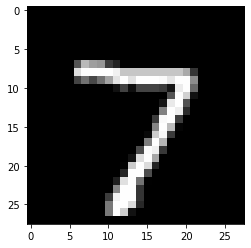

In [91]:
img, label = test_dataset[0]
print("Shape:", img.shape)
print("Label: ", label)
plt.imshow(img[0], cmap='gray')

In [92]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [99]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

img.squeeze simple adds another dimension at the beginning of the 1x28x28, making it a 1x1x28x28 tensor, which the model views as a batch containig a single image.

Label:  7  , Predicted:  7


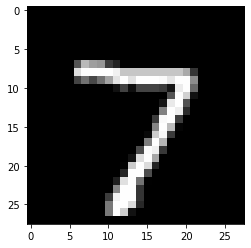

In [101]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print("Label: ", label, " , Predicted: ", predict_image(img, model))

Label:  0  , Predicted:  0


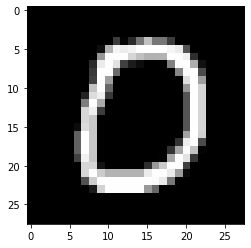

In [102]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print("Label: ", label, " , Predicted: ", predict_image(img, model))

Label:  2  , Predicted:  8


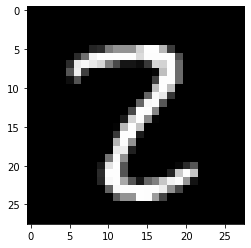

In [104]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print("Label: ", label, " , Predicted: ", predict_image(img, model))

In [106]:
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print("Loss: {:.4f}, Accuracy: {:.4f}".format(test_loss, test_acc))

Loss: 0.4928, Accuracy: 0.8817


The accuracy tends to increase as model runs more experiment and learns more

# Save Model's Weight and Bias and Load

In [107]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [108]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0057,  0.0194, -0.0035,  ..., -0.0345,  0.0203, -0.0215],
                      [ 0.0229,  0.0199, -0.0309,  ...,  0.0343,  0.0019,  0.0088],
                      [-0.0189,  0.0003,  0.0177,  ...,  0.0112,  0.0049,  0.0354],
                      ...,
                      [-0.0317,  0.0273,  0.0081,  ...,  0.0192,  0.0351,  0.0250],
                      [ 0.0064, -0.0075,  0.0067,  ...,  0.0049,  0.0332, -0.0005],
                      [ 0.0176,  0.0275, -0.0304,  ..., -0.0184, -0.0110,  0.0285]])),
             ('linear.bias',
              tensor([-0.0808,  0.1278, -0.0508, -0.0537,  0.0729,  0.0640,  0.0175,  0.0624,
                      -0.1853, -0.0317]))])

In [109]:
model2 = MnistModel()
model2.load_state_dict(torch.load("mnist-logistic.pth"))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0057,  0.0194, -0.0035,  ..., -0.0345,  0.0203, -0.0215],
                      [ 0.0229,  0.0199, -0.0309,  ...,  0.0343,  0.0019,  0.0088],
                      [-0.0189,  0.0003,  0.0177,  ...,  0.0112,  0.0049,  0.0354],
                      ...,
                      [-0.0317,  0.0273,  0.0081,  ...,  0.0192,  0.0351,  0.0250],
                      [ 0.0064, -0.0075,  0.0067,  ...,  0.0049,  0.0332, -0.0005],
                      [ 0.0176,  0.0275, -0.0304,  ..., -0.0184, -0.0110,  0.0285]])),
             ('linear.bias',
              tensor([-0.0808,  0.1278, -0.0508, -0.0537,  0.0729,  0.0640,  0.0175,  0.0624,
                      -0.1853, -0.0317]))])

In [110]:
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model2, loss_fn, test_loader, metric=accuracy)
print("Loss: {:.4f}, Accuracy: {:.4f}".format(test_loss, test_acc))

Loss: 0.4928, Accuracy: 0.8817
